##  **Task 1: Trend Analysis and Mathematical Model**

>  **Objective**:<br>
> We need to find the trend in the production data and **provide a mathematical model** that can explain the trend accurately. We must avoid using a linear approach.

**Step-by-Step**<br>
1. **Choose a Non-Linear Model**: Based on the plot, an exponential growth model seems appropriate. The exponential model can be represented as:$$ 𝑦=𝑎⋅𝑒^{bx} $$ where y is the production, $x$ is the month, and $a$ and $b$ are constants.

2. **Fit the Exponential Model**: Use curve fitting to estimate the parameters $a$ and $b$.

3. **Evaluate the Model**: Check the model's accuracy using statistical measures like R-squared.

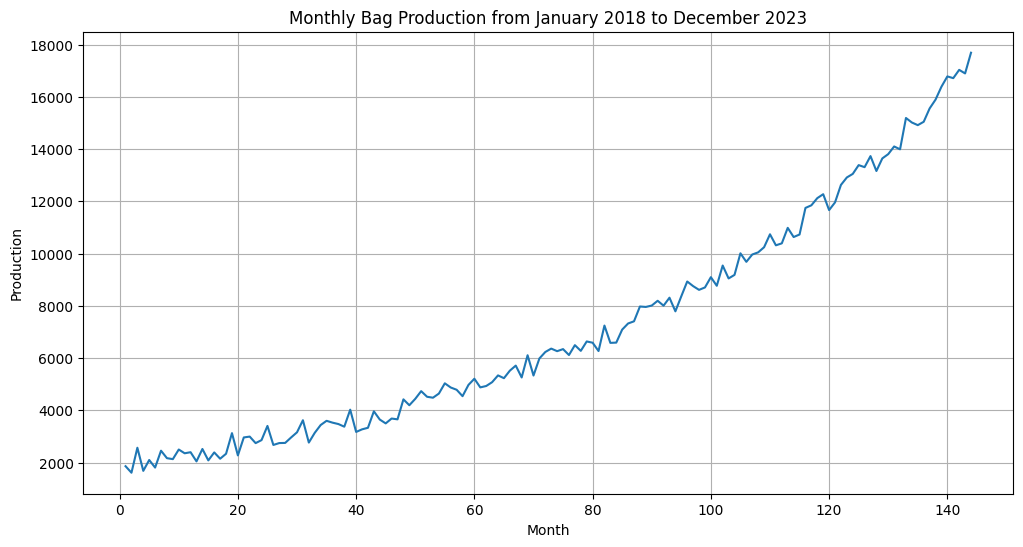

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Get data
data = pd.read_csv("Data/aol_data.csv").transpose().to_numpy()
data_values = [[i + 1, data[i][0]] for i in range(data.size)]
data = pd.DataFrame(data=data_values, columns=["Month", "Production"], )

# visualize data
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Production'])
plt.title('Monthly Bag Production from January 2018 to December 2023')
plt.xlabel('Month')
plt.ylabel('Production')
plt.grid(True)
plt.show()

The plot indicates a clear **upward trend** in the production of bags over time. This suggests that the production is increasing, but **not linearly**. A non-linear model such as a *polynomial, exponential, or logarithmic* model might be more appropriate to capture this trend.

**Polynomial Degree**: The choice of a cubic *polynomial* allows us to **capture** more **complex trends** than a linear or quadratic model. It accounts for potential inflection points where the rate of production change might accelerate or decelerate.

**Trend Analysis**: The polynomial coefficients describe the overall trend in production. For instance, a positive coefficient for the cubic term indicates that production might be accelerating over time.

#### **Fit a Polynomial Model**


A polynomial model of degree $n$ can be represented as:
$$y=a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{1}x+a_{0}$$
We'll try fitting a polynomial model of degree 3 to the data.<br>
Where:
- $y$ is the productuion
- $x$ is the month
- $a_{3},a_{2},a_{1},a_{0}$ are the coefficients

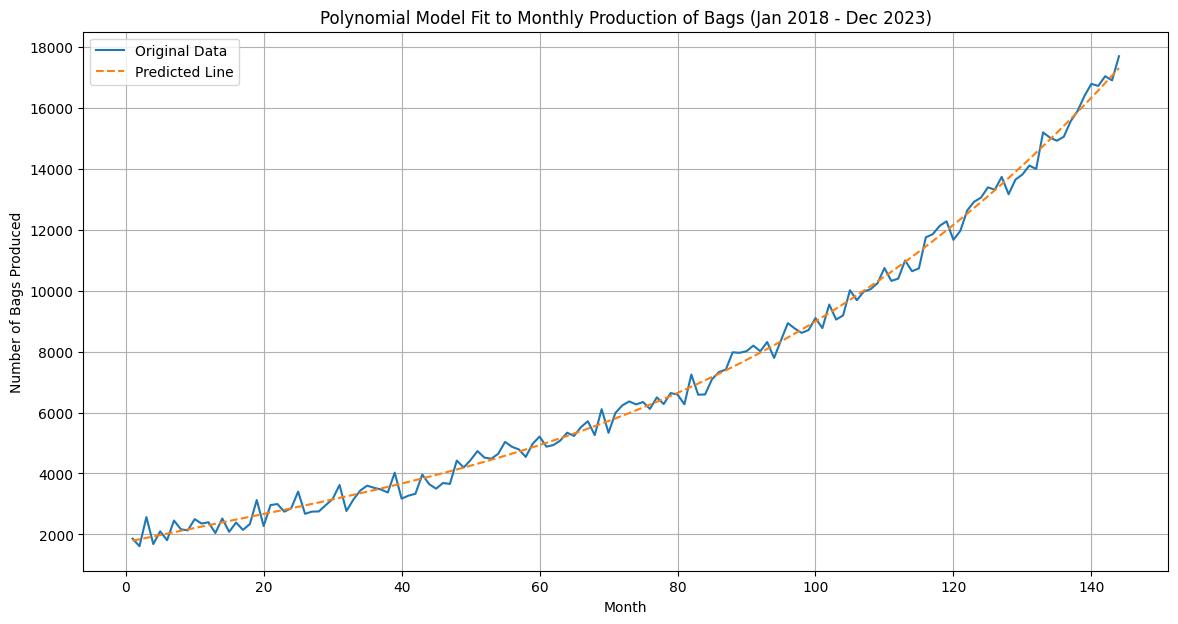

In [131]:
import numpy as np

production_data = data["Production"] 

x_data = np.arange(1, 145) # months 1-145
y_data = np.array(production_data)

# model function
def polynomial_model(x, *coeffs):
    return np.polyval(coeffs, x)

# fit values
degree = 3
polynomial_coefficients = np.polyfit(x_data, y_data, degree)

polynomial_model_func = np.poly1d(polynomial_coefficients)

y_fitted_poly = polynomial_model_func(x_data)

# visualize
plt.figure(figsize=(14, 7))
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fitted_poly, label=f'Predicted Line', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Number of Bags Produced')
plt.title('Polynomial Model Fit to Monthly Production of Bags (Jan 2018 - Dec 2023)')
plt.legend()
plt.grid(True)
plt.show()


#### **Evaluate the Model**
Evaluate the model fit using the *R-squared* value:

In [132]:
# Calculate the accuracy(R-squared)
residuals_poly = y_data - y_fitted_poly
ss_res_poly = np.sum(residuals_poly**2)
ss_tot_poly = np.sum((y_data - np.mean(y_data))**2)
r_squared_poly = 1 - (ss_res_poly / ss_tot_poly)

print('Polynomial Coefficients:', polynomial_coefficients)
print('R-squared:', r_squared_poly)


Polynomial Coefficients: [ 3.86326992e-03 -1.34357030e-01  4.72235525e+01  1.74850672e+03]
R-squared: 0.9955827620372667


It shows that using the **Polynomial model** can produce <span style="font-size:22px;">**99%**</span> **accuracy**. 

The polynomial coefficients and the R-squared value provide a measure of how well the model fits the data. A higher R-squared value indicates a better fit.

##  **Task 2: Convert Mathematical Model to Numerical Form**

> **Objective**: <br>
> **Convert** the **mathematical model** obtained from Task 1 into its numerical form so that it can be easily used in a computer program.

The polynomial model can be represented as:
$$y=a_{3}x^{3}+a_{2}x^{2}+a_{1}x+a_{0}$$
Where:
- $y$ is the productuion
- $x$ is the month
- $a_{3},a_{2},a_{1},a_{0}$ are the coefficients

The coefficients obtained from the polynomial model will be used in the numerical form:

In [133]:
a3, a2, a1, a0 = polynomial_coefficients # extract model
print(f'Polynomial Model: y = {a3}x^3 + {a2}x^2 + {a1}x + {a0}')


Polynomial Model: y = 0.003863269915151094x^3 + -0.13435703032501803x^2 + 47.2235525477943x + 1748.5067230242541


it shows that the numerical form is:
$$y=0.003863269915151094x^{3}+(-0.13435703032501803)x^{2}+47.2235525477943x+1748.5067230242541$$

## **Task 3: Warehouse Capacity and Prediction**


> **Objective**:<br>
> The warehouse can store a maximum of **25,000 bags** each month. <br>
> We need to **predict** when EIGER will need to build a new warehouse based on the trend identified in Task 1. The new warehouse construction will take **13 months**.

**Steps to Achieve**:<br>
1. <span style="font-size:20px;">**Define Warehouse Capacity**</span>: The warehouse capacity is **defined** as 25,000 bags per month. We need to predict when the monthly production will exceed this capacity.

2. <span style="font-size:20px;">**Use Polynomial Model for Prediction**</span>: Using the *polynomial model* fitted in Task 1, we will **predict future production** values to determine when they exceed the warehouse capacity.

3. <span style="font-size:20px;">**Determine the Month to Start Building the New Warehouse**</span>: Given that constructing a new warehouse takes **13 months**, we will subtract 13 months from the predicted month when production exceeds the capacity to determine when to start building the new warehouse.

In [134]:
# predict by mohnts
extended_months = np.arange(1, 201)
predicted_production = polynomial_model_func(extended_months)

capacity_limit = 25000
month_exceeds_capacity = np.argmax(predicted_production > capacity_limit) + 1

start_construction_month = month_exceeds_capacity - 13 

# Ensure within valid range
if start_construction_month < 1:
    start_construction_month = 1

print('Month when production exceeds warehouse capacity:', month_exceeds_capacity)
print('Month to start building new warehouse:', start_construction_month)

Month when production exceeds warehouse capacity: 171
Month to start building new warehouse: 158


And now we look at the **results** of the **graph** with our new data analysis

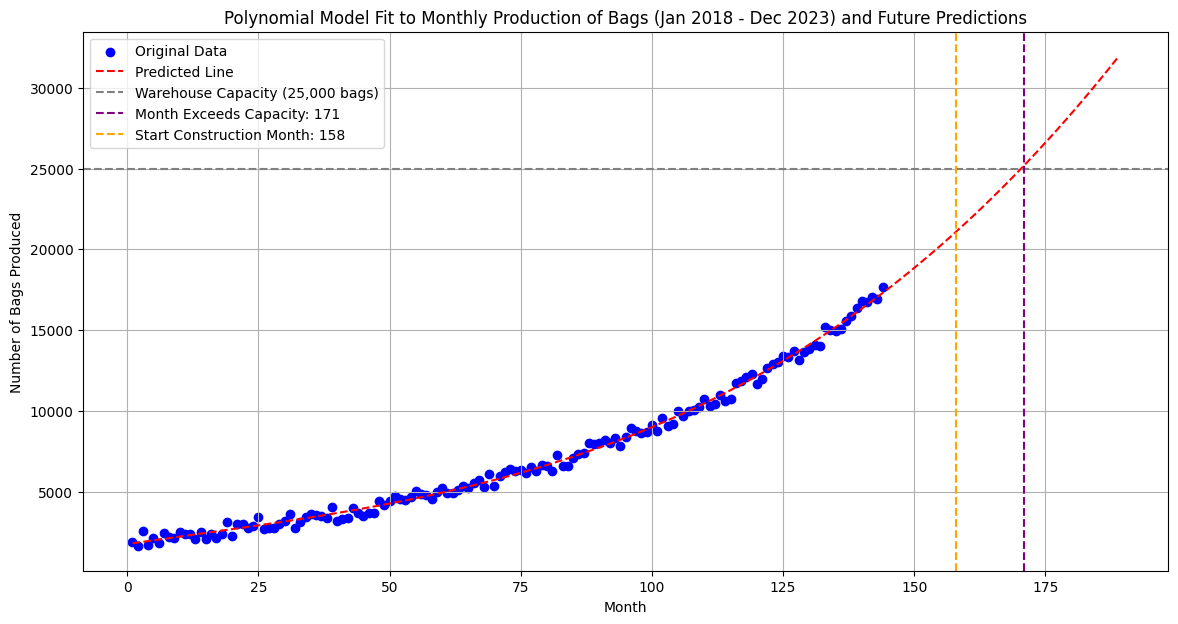

In [135]:
# extend predicted line
x_predict_ = np.arange(1, 190)
y_predict_ = polynomial_model_func(x_predict_)

# visualize
plt.figure(figsize=(14, 7))
plt.scatter(x_data, y_data, label='Original Data', color='blue') # original data
plt.plot(x_predict_, y_predict_, label=f'Predicted Line', linestyle='--', color='red') # predicted data

plt.axhline(y=capacity_limit, color='gray', linestyle='--', label='Warehouse Capacity (25,000 bags)')
plt.axvline(x=month_exceeds_capacity, color='purple', linestyle='--', label=f'Month Exceeds Capacity: {month_exceeds_capacity}')
plt.axvline(x=start_construction_month, color='orange', linestyle='--', label=f'Start Construction Month: {start_construction_month}')

plt.xlabel('Month')
plt.ylabel('Number of Bags Produced')
plt.title('Polynomial Model Fit to Monthly Production of Bags (Jan 2018 - Dec 2023) and Future Predictions')
plt.legend()
plt.grid(True)
plt.show()


## **Task 4: Provide Code**


> **Objective:**<br>
> Provide the code used to solve the tasks above in a Python script file (.py).<br>
> Let's start by analyzing the trend in the data and fitting a non-linear model.

The code below will be saved in the file `Analyze.py`

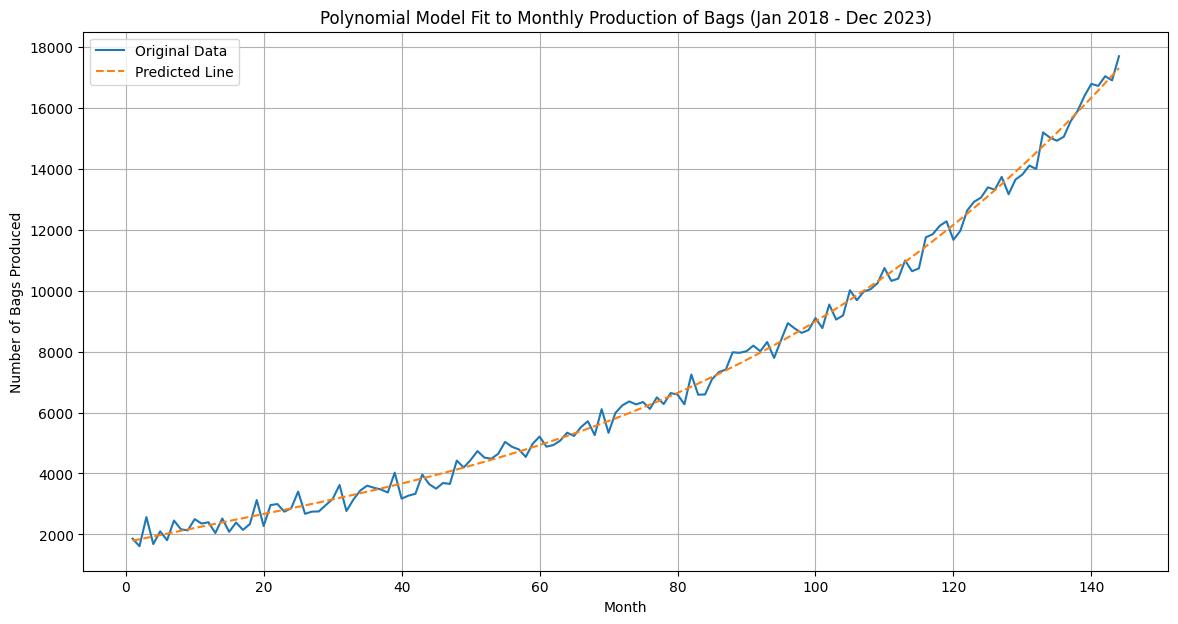

Polynomial Coefficients: [ 3.86326992e-03 -1.34357030e-01  4.72235525e+01  1.74850672e+03]
R-squared (accuracy): 0.9955827620372667
numerical form: y = 0.003863269915151094x^3 + -0.13435703032501803x^2 + 47.2235525477943x + 1748.5067230242541

The warehouse can store a maximum of 25,000 bags each month.
The new warehouse construction will take 13 months
Month when production exceeds warehouse capacity: 171
Month to start building new warehouse: 158


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Get data
data_path = 'Data/aol_data.csv'
data = pd.read_csv(data_path)

production_data = data.iloc[0].tolist()

x_data = np.arange(1, 145)# months 1-145
y_data = np.array(production_data)

#model function
def polynomial_model(x, *coeffs):
    return np.polyval(coeffs, x)

# fit values
degree = 3
polynomial_coefficients = np.polyfit(x_data, y_data, degree)

polynomial_model_func = np.poly1d(polynomial_coefficients)

y_fitted_poly = polynomial_model_func(x_data)

#visualize scatted data with prediction
plt.figure(figsize=(14, 7))
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fitted_poly, label=f'Predicted Line', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Number of Bags Produced')
plt.title('Polynomial Model Fit to Monthly Production of Bags (Jan 2018 - Dec 2023)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the accuracy
residuals_poly = y_data - y_fitted_poly
ss_res_poly = np.sum(residuals_poly**2)
ss_tot_poly = np.sum((y_data - np.mean(y_data))**2)
r_squared_poly = 1 - (ss_res_poly / ss_tot_poly)

print('Polynomial Coefficients:', polynomial_coefficients)
print('R-squared (accuracy):', r_squared_poly)

a3, a2, a1, a0 = polynomial_coefficients # extract model
print(f'numerical form: y = {a3}x^3 + {a2}x^2 + {a1}x + {a0}')

# predict by mohnts
extended_months = np.arange(1, 201)
predicted_production = polynomial_model_func(extended_months)

capacity_limit = 25000
month_exceeds_capacity = np.argmax(predicted_production > capacity_limit) + 1

start_construction_month = month_exceeds_capacity - 13

# Ensure within valid range
if start_construction_month < 1:
    start_construction_month = 1

print("\nThe warehouse can store a maximum of 25,000 bags each month.")
print("The new warehouse construction will take 13 months")
print('Month when production exceeds warehouse capacity:', month_exceeds_capacity)
print('Month to start building new warehouse:', start_construction_month)


In [2]:
pip install matplotlib pandas numpy


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
